In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Calculating entropy of x
-1 * (+ 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 1.00*log2(1.00)1.00*log2(1.00)+ 0 2.00*log2(2.00)2.00*log2(2.00)1.00*log2(1.00)3.00*log2(3.00)1.00*log2(1.00)5.00*log2(5.00)5.00*log2(5.00)7.00*log2(7.00)13.00*log2(13.00)19.00*log2(19.00)22.00*log2(22.00)25.00*log2(25.00)60.00*log2(60.00)55.00*log2(55.00)75.00*log2(75.00)56.00*log2(56.00)72.00*log2(72.00)83.00*log2(83.00)70.00*log2(70.00)66.00*log2(66.00)72.00*log2(72.00)61.00*log2(61.00)40.00*log2(40.00)59.00*log2(59.00)47.00*log2(47.00)49.00*log2(49.00)37.00*log2(37.00)37.00*log2(37.00)37.00*log2(37.00)31.00*log2(31.00)29.00*log2(29.00)28.00*log2(28.00)35.00*log2(35.00)26.00*log2(26.00)34.00*log2(34.00)22.00*log2(22.00)32.00*log2(32.00)34.00*log2(34.00)35.00*log2(35.00)32.00*log2(32.00)34.00*log2(34.00)37.00*log2(37.00)44.00*log2(44.00)37.00*log2(37.00)33.00*log2(33.00)32.00*log2(32.00)30.00*log2(30.00)35.00*log2(35.00)24.00*log2(

<BarContainer object of 256 artists>

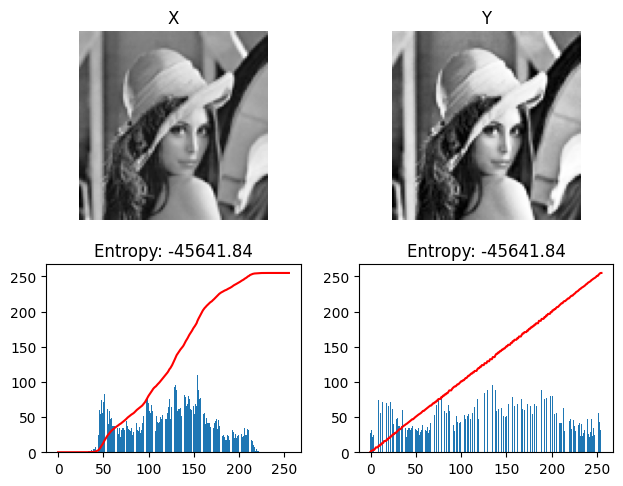

In [90]:
def calculate_entropy(density_hist):
    formula = "-1 * ("
    for v in density_hist:
        if v == 0:
            formula += "+ 0 "
        else:
            formula += f"{v:.2f}*log2({v:.2f})"
    
    ans =  -1 * sum([v * np.log2(v) for v in hist_x if v != 0])
    formula += f") = {ans:.2f}"
    print(formula)
    return ans

max_color = 256
colors = list(range(max_color))
x = cv2.imread('./image.png', cv2.IMREAD_GRAYSCALE)
x = cv2.resize(x, (0, 0), fx=0.8, fy=0.8)

hist_x, bins_x = np.histogram(x, max_color, (0, max_color))
cdf_x = hist_x.cumsum()
cdf_x = (max_color - 1) * cdf_x / cdf_x[-1]
print("Calculating entropy of x")
entropy_x = calculate_entropy(hist_x)


y = cdf_x[x]
hist_y, bins_y = np.histogram(y, max_color, (0, max_color))
cdf_y = hist_y.cumsum()
cdf_y = (max_color - 1) * cdf_y / cdf_y[-1]
print("Calculating entropy of y")
entropy_y = calculate_entropy(hist_y)

plt.subplots(2, 2)
plt.tight_layout()

plt.subplot(2, 2, 1)
plt.imshow(x, cmap="gray")
plt.title("X")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title(f"Entropy: {entropy_x:.2f}")
plt.plot(cdf_x / cdf_x.max() * hist_x.max(), color="red")
plt.bar(x=colors, height=hist_x)

plt.subplot(2, 2, 2)
plt.imshow(y, cmap="gray")
plt.title("Y")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title(f"Entropy: {entropy_y:.2f}")
plt.plot(cdf_y / cdf_y.max() * hist_y.max(), color="red")
plt.bar(x=colors, height=hist_y)